# Análisis Exploratorio de Datos

Es el proceso de conocer detalladamente y darles sentido para ver comportamientos, determinar como tratarlos para la resolución del problema y transformarlos en información útil

## ¿Cómo hacer un buen análisis y por qué?

Es importante que al tener datos se organicen y entiendan las variables, con esto tambien se puede establecer las relaciones entre variables, encontrar patrones, preparar el terreno para escoger el modelo correcto para la necesidad correcta y para lograr tomar decisiones con los antecedentes de los datos que se tengan. Pasos:

- Hacer preguntas que busquen guiar el proceso de exploración

- Determinar el tamaño de los datos, considerando la eliminación de observaciones y variables

- Categorizar las variables, si son numéricas o categóricas, esto con el fin de saber como manejar cada una de ellas

- Limpieza y validación de datos, determinar la proporción de datos faltantes y como tratarlos, ver su distribución y datos atípicos

- Establecer relaciones entre variables, como cambia el analisi si se consideran o no ciertas variables, buscar agrupamientos

## Tipos de analítica de datos:

- Descriptiva: Es el análisis más básico. Permite dar una vista general de las propiedades, dimensiones y comportamiento de un fenómeno desde la descripción de los datos.

- Diagnóstica: Es aplicar criterios para identificar una situación problemática, permite establecer relaciones entre variables y crear hipótesis sobre las causas de un comportamiento.

- Predictiva: Es utilizar los datos para explicar un posible comporta miento de las variables de interés si se siguen las tendencias actuales o si se cambian. Permite determinar el riesgo a futuro.

- Prescriptiva: Utilizar los datos para la toma de decisiones con base a eventos pasados. Porpone soluciones basadas en evidencia.

## Tipos de datos

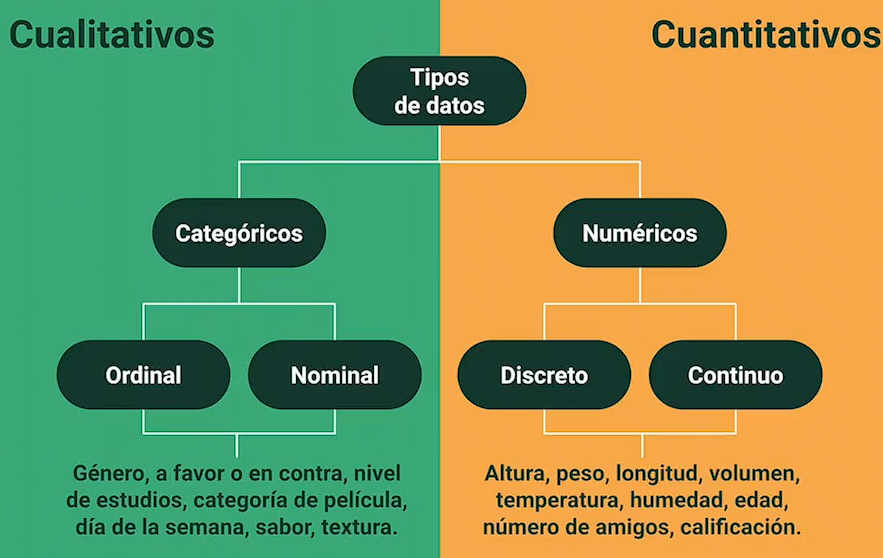

- Cualitativas
    
    - Nominales: Son las que se les asigna una cualidad. Por ejemplo un color.

    - Ordinales: Que tienen un orden. Por ejemplo: alto, medio, bajo.

    - Binarias: Representan estados, que toman dos valores. Por ejemplo: Existe, género.

- Cuantitativas 

    - Discretas: Son finitas y toman ciertos valores, pueden verse como variables separadas por un "paso". Por ejemplo, una persona puede tener 1,  2 o 3 amigos, nuna 3.5.

    - Continuas: Pueden verse como infinitos dentro de los reales en un rango establecido. Por ejemplo, la estatura.

## Tipos de análisis

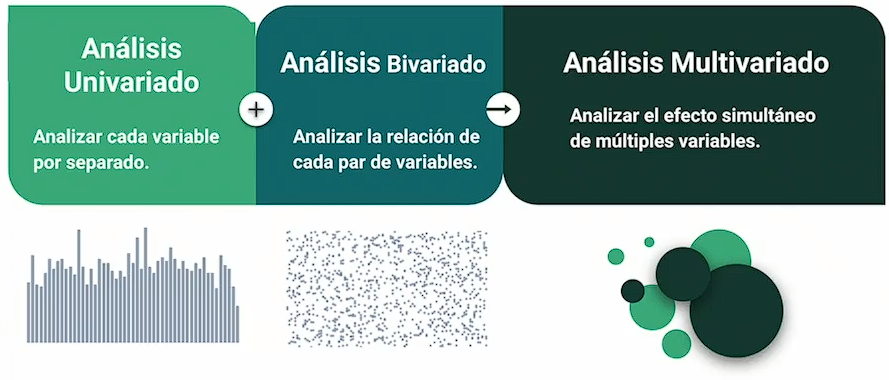

- Univariado: Busca analizar cada variable de forma independiente, entendiendo sus caracteristicas, definiciones y propiedades.

- Bivariado: Analiza las relaciones entre cada par de variables.

- Multivariado: Es el efecto simultáneo de múltiples variables, es el análisis más usado puesto que permite dar una visión general del problema.

## Proyecto pingüinos

In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import sklearn.metrics as metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

C:\Users\shani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\palmerpenguins\penguins.py:2: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
C:\Users\shani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pkg_resources\__init__.py:2871: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
C:\Users\shani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pkg_resources\__init__.py:2871: DeprecationWarning: Depreca

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

### Conociendo los datos

Datos crudos

In [4]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


Datos preprocesados

In [5]:
preprocess_penguins_df = palmerpenguins.load_penguins()
preprocess_penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Usando seaborn

In [6]:
sns.load_dataset("penguins").head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Recolección de datos, limpieza y validación

La recolección de datos es la forma de recolectar información que permite obtener conocimiento de primera mano e ideas originales sobre el problema de investigación

**Tipos de Recolección de Datos**

- Primaria: Datos colectados de primera mano a traves de encuestas, entrevistas, experimentos y otros. Puedes decidir que recolectas y que quiere medir. Tienes total control de los datos.

- Secundaria: Datos previamente recolectados por una fuente primaria externa al usuario primario. Son datos abiertos que puedes utilizar. No tienes control sobre lo que se mide o sobre el objetivo del estudio

- Terciaria: Datos que se adquieren de fuentes completamente externas al usuario primario. Son datos accesibles a todo el mundo por lo que pierde su valor y tienden a ser datos genericos

**Validación de los datos**

Es el proceso de asegurar la consistencia y precisión dentro de un conjunto de datos. Para asegurar la consistencia de los datos debemos validar:

* Modelo de datos: si un tercero recolecto los datos, verifica que preguntas queria responder con los datos. Si eres quien recolecta los datos, hazte muchas preguntas y considera si esos datos son suficientes para responderlas

* Seguimiento de formato estándar de archivos: verifica que la extensión de los archivos que estas manejando correspondan con el formato interno que tienen. Asegurate que los numeros se expresen en el formato que estas trabajando.

* Tipos de Datos: verifica que los datos sen del tipo que se indica en el dataset

* Rango de variables: verifica que las variables estén dentro del rango establecido en la recoleccion de datos. En caso de encontrar variables fuera del rango preguntate: como llegaron esos datos aqui? tienen algun significado alterno? debo preservarlos o eliminarlos?

* Unicidad: verifica que tan unicos son los datos. detecta si existe duplicidad en los datos y corrige.

* Consistencia de expresiones: se refiere a como la persona que recolecta los datos define sus variables. Formato de fecha, de hora, variables escritas de la misma forma en toda la tabla. No son datos erroneos, solo es cuestion de darle el formato adecuado

* Valores nulos: pueden estar explicitos o implicitos en el dataset. Son datos faltantes. Porque esta vacio? puedo rellenarlo con otro dato? esta vacio por un proceso aleatorio o tiene un sentido?

#### Validación

Tipos de dato de las variables

In [7]:
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

Cantidad de variables de cada tipo

In [8]:
preprocess_penguins_df.dtypes.value_counts()

float64    4
object     3
int64      1
dtype: int64

Cantidad observaciones (rows) y de variables (columns)

In [9]:
preprocess_penguins_df.shape

(344, 8)

##### Valores nulos

¿Existen valores nulos?

In [10]:
preprocess_penguins_df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

Cantidad de valores nulos en cada columna

In [11]:
preprocess_penguins_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Cantidad de valores nulos en todo el df

In [12]:
preprocess_penguins_df.isnull().sum().sum()

19

Proporción de valores nulos

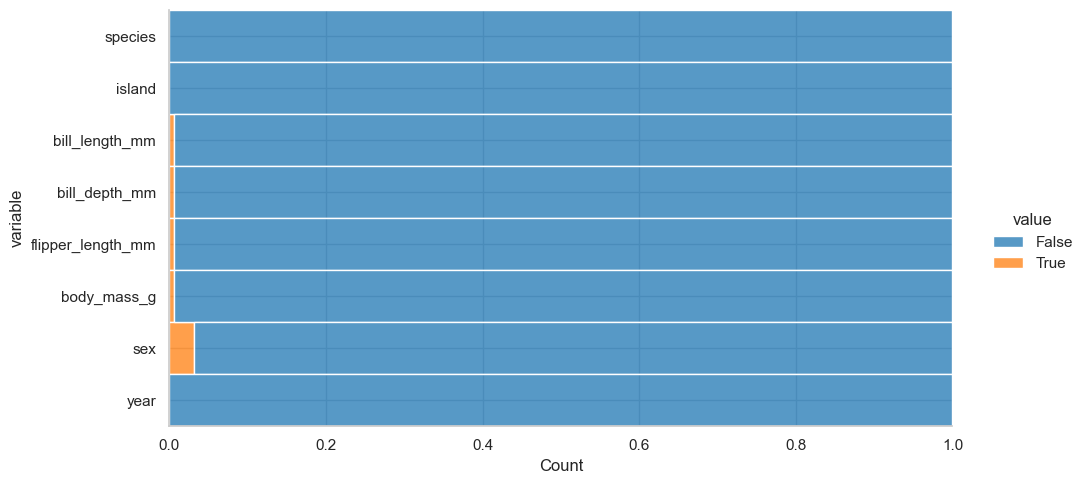

In [13]:
preprocess_penguins_df.isnull().melt().pipe(
    lambda df: sns.displot(df,y="variable", hue="value", multiple="fill", aspect=2)
)
# sns.displot(preprocess_penguins_df.isnull().melt(),y="variable", hue="value", multiple="fill", aspect=2)

Visualizar valores nulos

<AxesSubplot: >

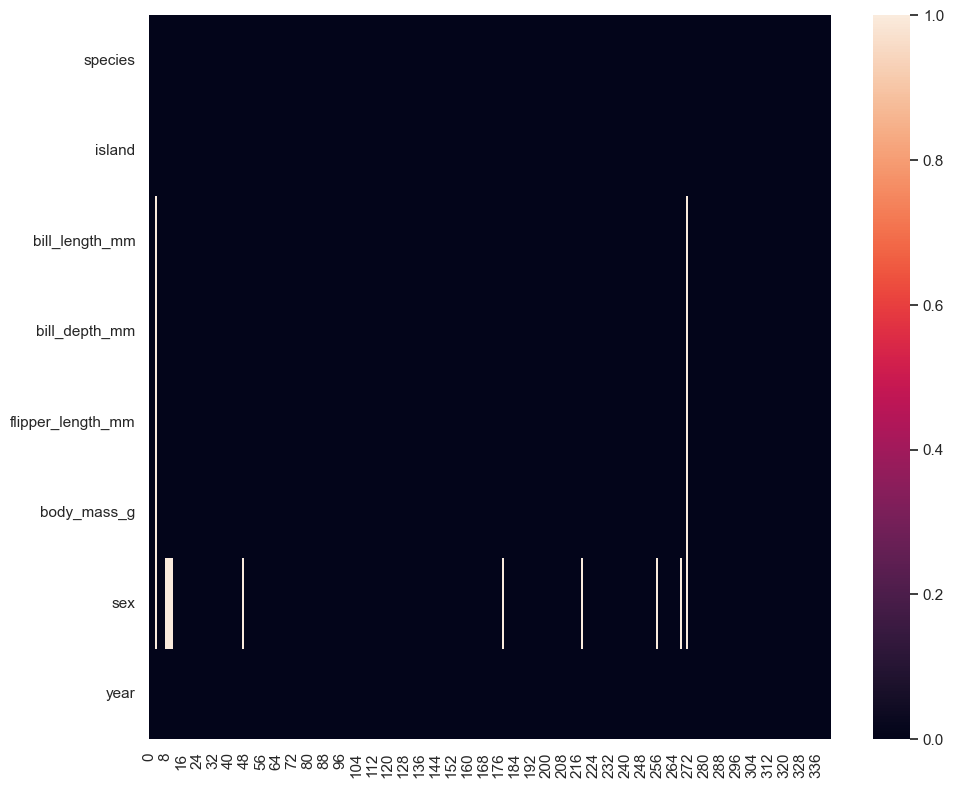

In [14]:
sns.heatmap(preprocess_penguins_df.isnull().transpose())

Eliminar valores nulos

In [15]:
processed_penguins_df = preprocess_penguins_df.dropna()
processed_penguins_df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

### Explorando una variable categórica

In [16]:
processed_penguins_df.describe(include=[object, bool])

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


In [17]:
categorical_cols = processed_penguins_df.select_dtypes(["object", "bool"]).columns
categorical_cols

Index(['species', 'island', 'sex'], dtype='object')

In [18]:
len(categorical_cols)

3

In [19]:
for i in range(3):
    print(i)

0
1
2


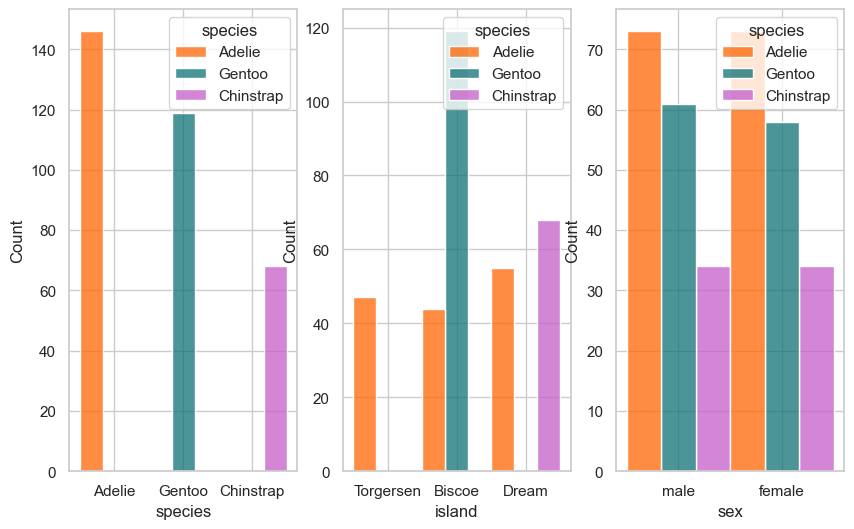

In [20]:
fig, ax = plt.subplots(1, len(categorical_cols), figsize=(10, 6))

for i in range(categorical_cols.value_counts().sum()):
    (
        processed_penguins_df
        .pipe(
            lambda df:
                sns.histplot(
                    ax=ax[i],
                    data=df,
                    x=categorical_cols[i],
                    palette=penguin_color,
                    hue="species",
                    multiple="dodge"
                )
            )
    )
plt.show()

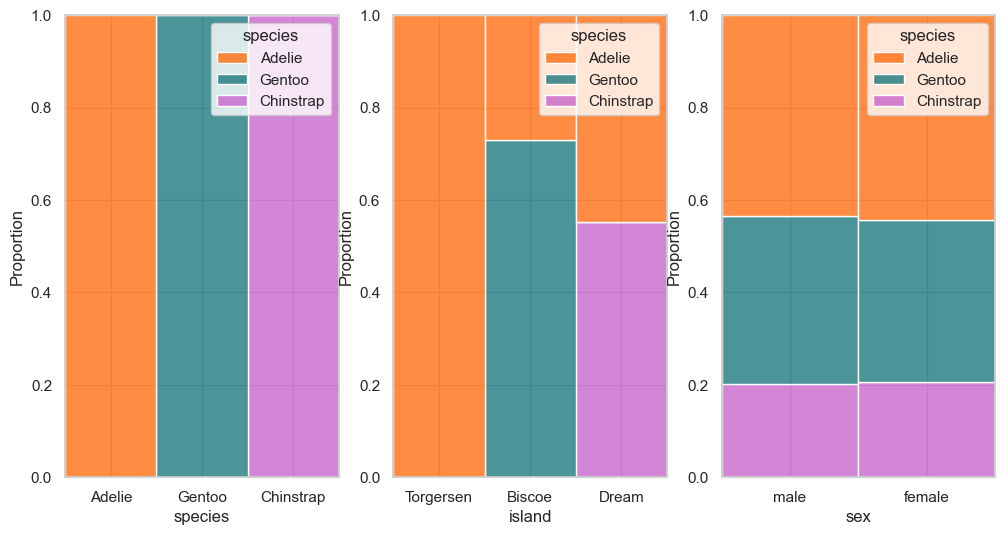

In [21]:
fig, ax = plt.subplots(1, len(categorical_cols), figsize=(12, 6))
for i in range(len(categorical_cols)):
    (
        processed_penguins_df
        .pipe(
            lambda df:
                sns.histplot(
                    ax=ax[i],
                    data=df,
                    x=categorical_cols[i],
                    palette=penguin_color,
                    hue="species",
                    multiple="fill",
                    stat="proportion"
                )
            )
    )
plt.show()

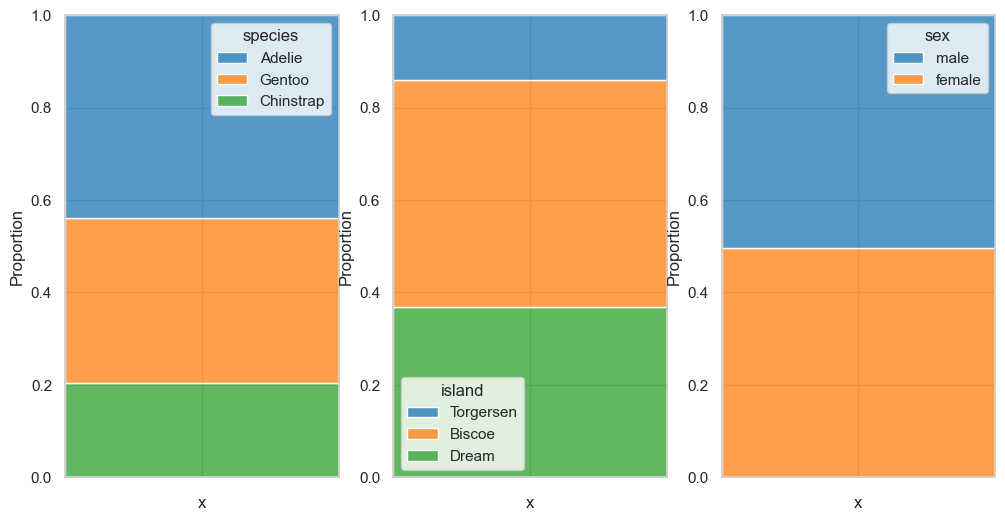

In [22]:
fig, ax = plt.subplots(1, len(categorical_cols), figsize=(12, 6))
for i in range(len(categorical_cols)):
    (
        processed_penguins_df.
        assign(x="")
        .pipe(
            lambda df:
                sns.histplot(
                    ax=ax[i],
                    data=df,
                    x="x",
                    hue=categorical_cols[i],
                    multiple="fill",
                    stat="proportion"
                )
            )
    )
plt.show()

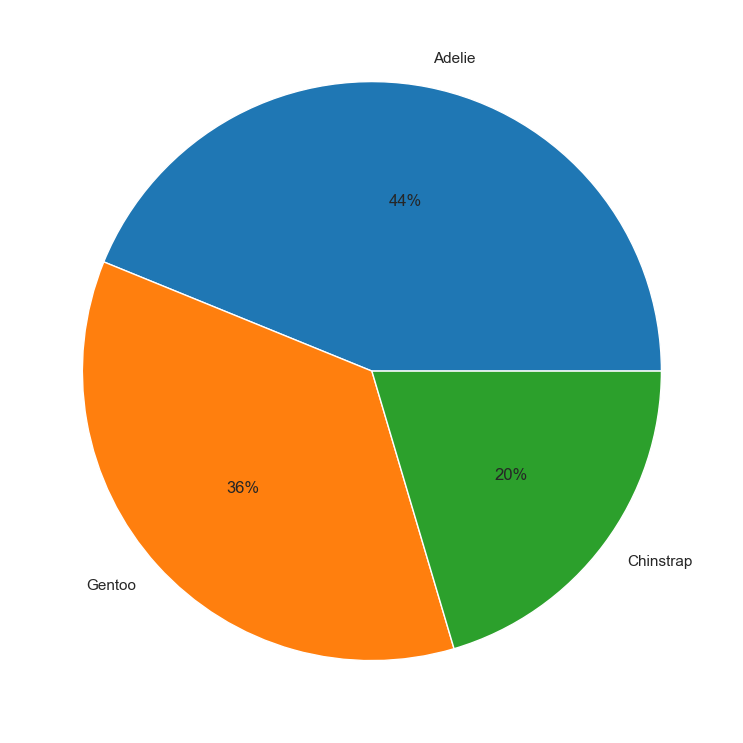

In [23]:
plt.pie(processed_penguins_df["species"].value_counts(),
        labels=processed_penguins_df["species"].value_counts().index,
        autopct='%.0f%%')
plt.show()

### [Medidas de tendencia central](5.%20Probabilidad.ipynb)

In [24]:
preprocess_penguins_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


#### Media

In [25]:
preprocess_penguins_df.mean(numeric_only=True)

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
year                 2008.029070
dtype: float64

#### Mediana

In [26]:
preprocess_penguins_df.median(numeric_only=True)

bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
year                 2008.00
dtype: float64

#### Moda

In [27]:
preprocess_penguins_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


### Medidas de dispersión

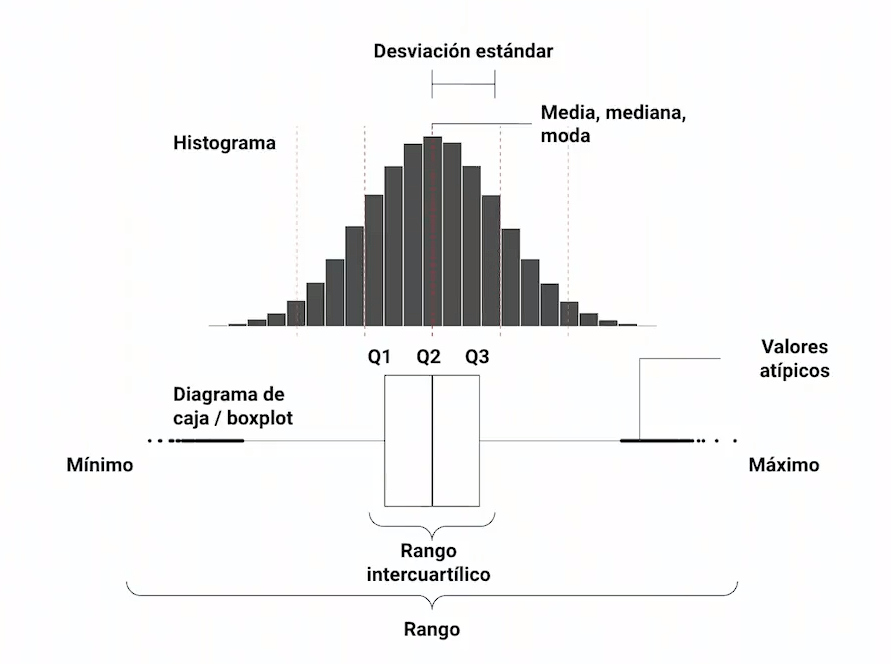

#### Rango

La diferencia entre el valor máximo y el mínimo

In [28]:
processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

#### Rango intercuartílico

Comprenden +-25% de los datos respecto a la mediana

In [29]:
processed_penguins_df.quantile(0.25, numeric_only=True) 

bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [30]:
processed_penguins_df.quantile(0.75, numeric_only=True) 

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [31]:
(
    processed_penguins_df
    .quantile(q=[0.25,0.50,0.75], numeric_only=True)
    .transpose()
    .assign(iqr=lambda df: df[0.75] - df[0.25])
)

,0.25,0.5,0.75,iqr
bill_length_mm,39.5,44.5,48.6,9.1
bill_depth_mm,15.6,17.3,18.7,3.1
flipper_length_mm,190.0,197.0,213.0,23.0
body_mass_g,3550.0,4050.0,4775.0,1225.0
year,2007.0,2008.0,2009.0,2.0


#### Desviación estándar

Habla de la dispersión de los datos, comprende un 65% de los datos

In [32]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [33]:
# Limite inferior del intervalo de confianza 65% suponiendo una distribución normal
processed_penguins_df.mean(numeric_only=True) - processed_penguins_df.std(numeric_only=True)

bill_length_mm         38.524124
bill_depth_mm          15.195629
flipper_length_mm     186.951202
body_mass_g          3401.841255
year                 2007.229098
dtype: float64

In [34]:
# Limite superior del intervalo de confianza 65% suponiendo una distribución normal
processed_penguins_df.mean(numeric_only=True) + processed_penguins_df.std(numeric_only=True)

bill_length_mm         49.461461
bill_depth_mm          19.134100
flipper_length_mm     214.982732
body_mass_g          5012.272859
year                 2008.854986
dtype: float64

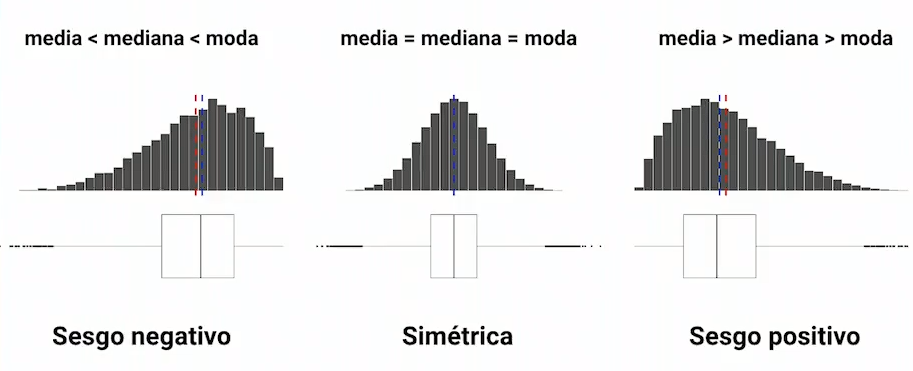

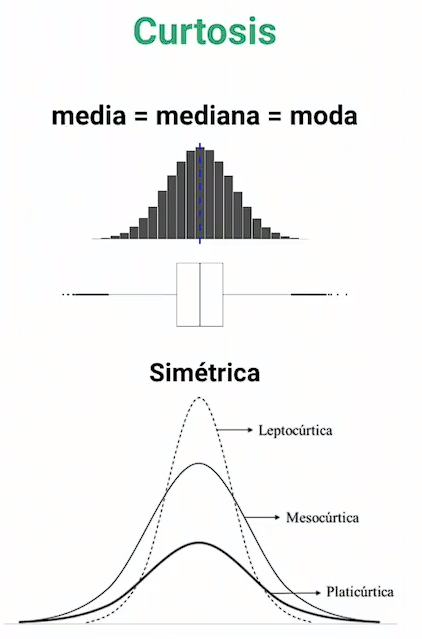 

Una curtosis mayor a 0 indica que la mayoria de los datos estan muy concentrados alrededor de la media, lo cual indica que hay poca variabilidad en los datos, es decir, el rango es pequeño

Una curtosis negativa indica lo contrario, los datos estan alejados de la media, lo cual indica mucha variabilidad en los datos, su rango es amplio

#### Visualización de la distribución

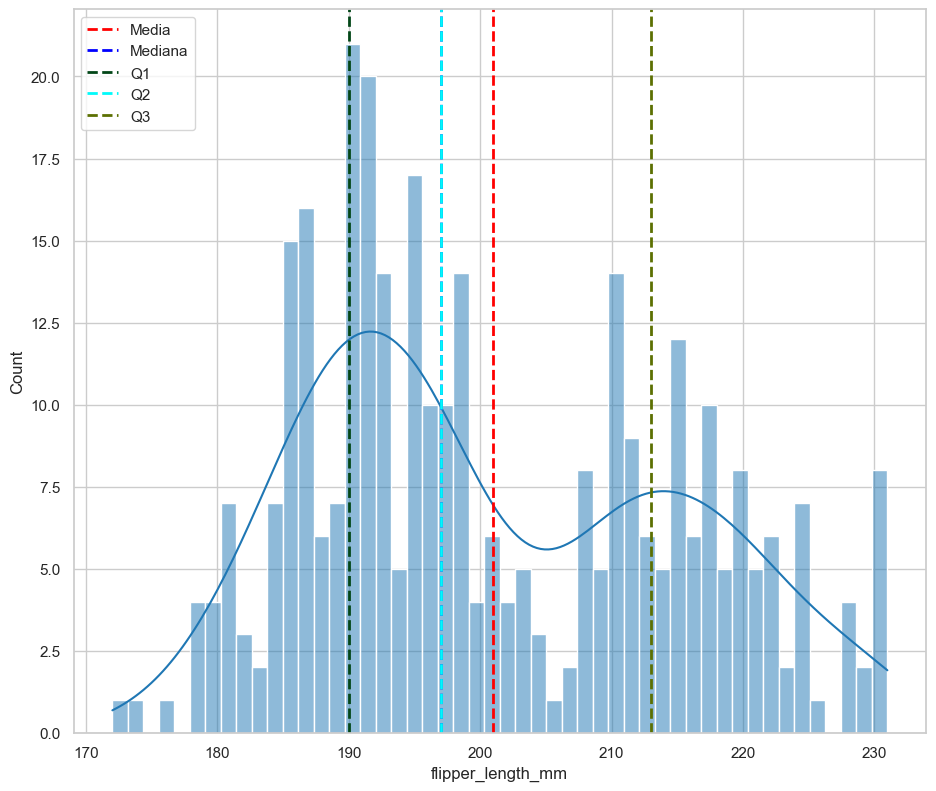

In [35]:
sns.histplot(
    data=processed_penguins_df,
    x="flipper_length_mm",
    bins=50,
    kde=True
)
plt.axvline(
    x=processed_penguins_df["flipper_length_mm"].mean(),
    color="red",
    linestyle="dashed",
    linewidth=2,
    label="Media"
)
plt.axvline(
    x=processed_penguins_df["flipper_length_mm"].median(),
    color="b",
    linestyle="dashed",
    linewidth=2,
    label="Mediana"
)
plt.axvline(
    x=processed_penguins_df["flipper_length_mm"].quantile(0.25),
    color="#024617",
    linestyle="dashed",
    linewidth=2,
    label="Q1"
)
plt.axvline(
    x=processed_penguins_df["flipper_length_mm"].quantile(0.50),
    color="#00FAFA",
    linestyle="dashed",
    linewidth=2,
    label="Q2"
)
plt.axvline(
    x=processed_penguins_df["flipper_length_mm"].quantile(0.75),
    color="#5C7002",
    linestyle="dashed",
    linewidth=2,
    label="Q3"
)
plt.legend(loc="upper left")
plt.show()

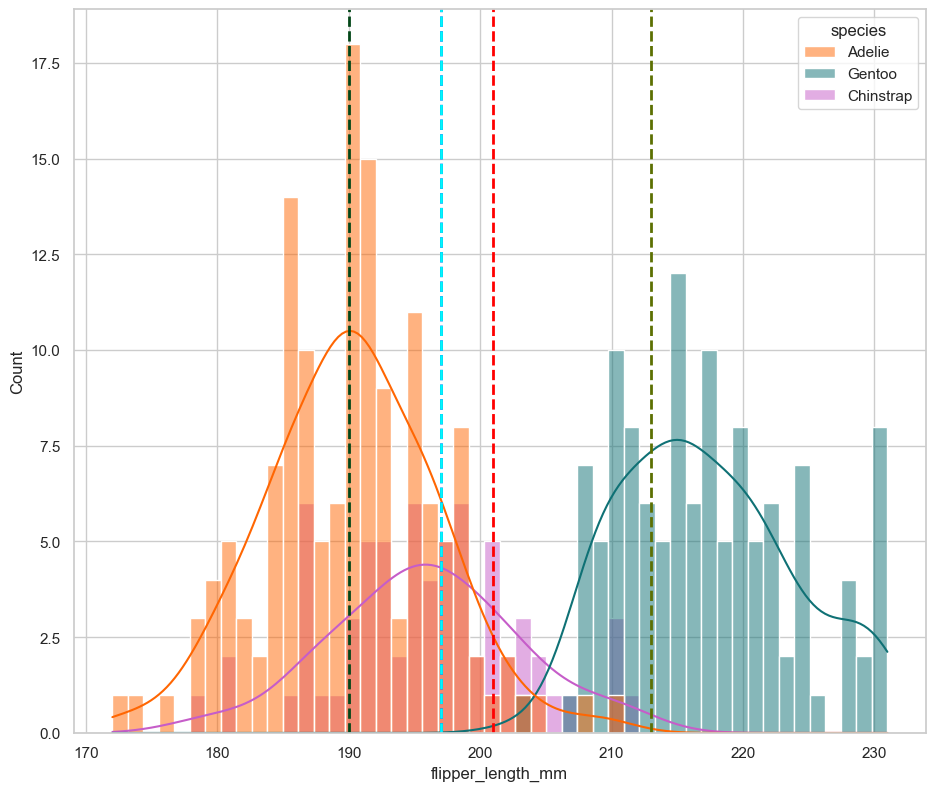

In [36]:
sns.histplot(
    data=processed_penguins_df,
    x="flipper_length_mm",
    bins=50,
    hue="species",
    palette=penguin_color,
    # alpha=0.6,
    kde=True
)
plt.axvline(
    x=processed_penguins_df["flipper_length_mm"].mean(),
    color="red",
    linestyle="dashed",
    linewidth=2,
    label="Media"
)
# Q_75(Blue)
plt.axvline(
    x=processed_penguins_df["flipper_length_mm"].median(),
    color="b",
    linestyle="dashed",
    linewidth=2,
    label="Mediana"
)
plt.axvline(
    x=processed_penguins_df["flipper_length_mm"].quantile(0.25),
    color="#024617",
    linestyle="dashed",
    linewidth=2,
    label="Q1"
)
plt.axvline(
    x=processed_penguins_df["flipper_length_mm"].quantile(0.50),
    color="#00FAFA",
    linestyle="dashed",
    linewidth=2,
    label="Q2"
)
plt.axvline(
    x=processed_penguins_df["flipper_length_mm"].quantile(0.75),
    color="#5C7002",
    linestyle="dashed",
    linewidth=2,
    label="Q3"
)
# plt.legend(loc="upper left")
plt.show()

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'year'],
      dtype='object')


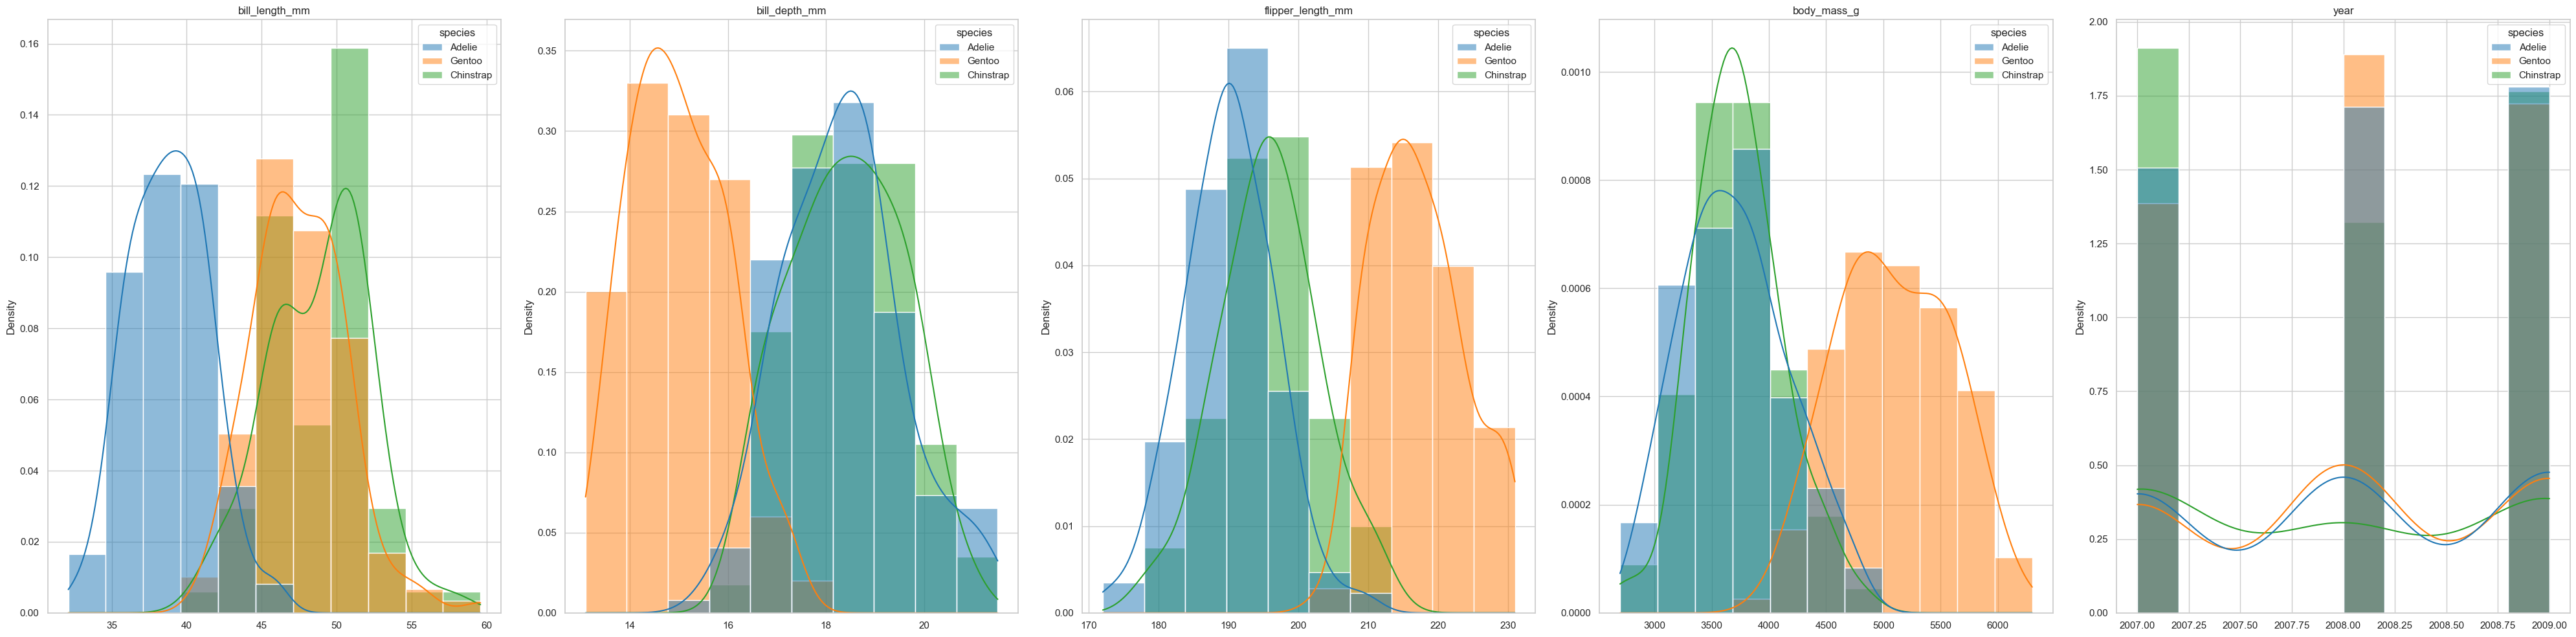

In [43]:
numeric_columns = processed_penguins_df.select_dtypes(include=np.number).columns
print(numeric_columns)
fig, ax = plt.subplots(1, len(numeric_columns), figsize=(40,10))

for i, col in enumerate(numeric_columns):
    sns.histplot(
        data=processed_penguins_df,
        ax=ax[i],
        x=col,
        hue="species",
        # binwidth=1,
        bins="auto",
        kde=True,
        alpha=.5,
        # element="step",
        common_norm=False,
        stat="density",
    )
    
    ax[i].set_title(col)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel("Density")

plt.tight_layout()

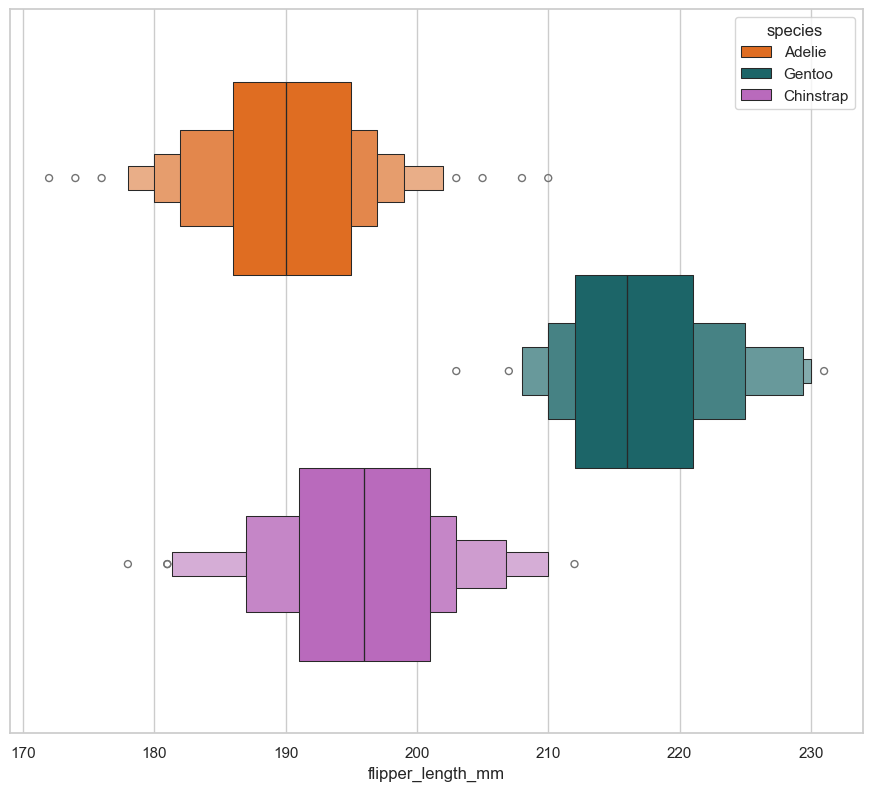

In [38]:
sns.boxenplot(
    data=preprocess_penguins_df,
    x="flipper_length_mm",
    hue="species",
    palette=penguin_color,
    k_depth=4
)
plt.show()

##### Función de probabilidad de masas (PMF)

Nos da la probabilidad de que una variable aleatoria discreta tome un valor determinado.

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Count'>

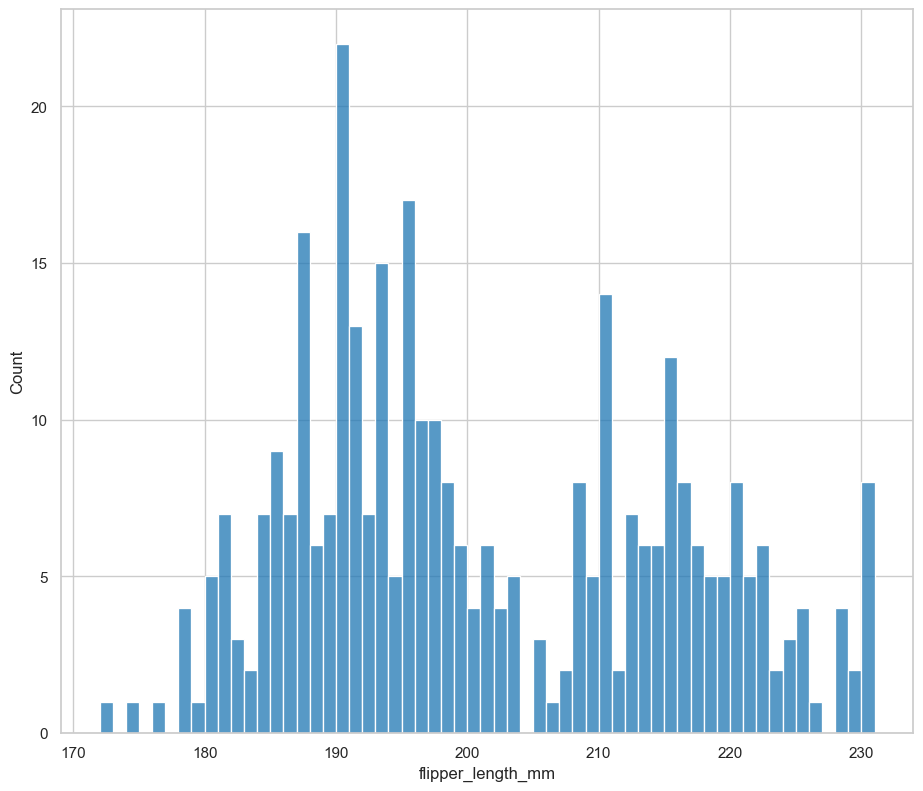

In [40]:
sns.histplot(
    data=preprocess_penguins_df,
    x="flipper_length_mm",
    binwidth=1
)

##### Función de distribución acumulada (CDF)

Nos da la probabilidad de que una variable aleatoria sea menor o igual a un valor determinado

##### Función de probabilidad de densidad (PDF)

Nos da la probabilidad de que una variable aleatoria discreta tome un valor determinado.